In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
datatrain =  pd.read_csv('titanic_train.csv')

In [3]:
datatest =  pd.read_csv('titanic_test.csv')

In [4]:
datatrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
datatestcopy = datatest.copy()

In [7]:
print(datatrain.shape)
print(datatest.shape)

(891, 12)
(418, 11)


In [8]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))
print('Test columns with null values: {}'.format( datatest.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
datatrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
datatest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
datatrain['Age'].fillna(datatrain['Age'].median(), inplace = True)
datatrain['Embarked'].fillna(datatrain['Embarked'].mode()[0], inplace = True)
datatrain['Fare'].fillna(datatrain['Fare'].median(), inplace = True)

datatest['Age'].fillna(datatest['Age'].median(), inplace = True)
datatest['Embarked'].fillna(datatest['Embarked'].mode()[0], inplace = True)
datatest['Fare'].fillna(datatest['Fare'].median(), inplace = True)

In [13]:
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))
print("*************************************")
print('Test columns with null values: {}'.format( datatest.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

*************************************
Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [14]:
#Now we are deleting the ['PassengerId','Cabin', 'Ticket'] COLUMNS
drop_column = ['PassengerId','Cabin', 'Ticket']
datatrain.drop(drop_column, axis=1, inplace = True)
datatest.drop(drop_column, axis=1, inplace = True)

In [15]:
datatrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
datatest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


<AxesSubplot:xlabel='Survived', ylabel='count'>

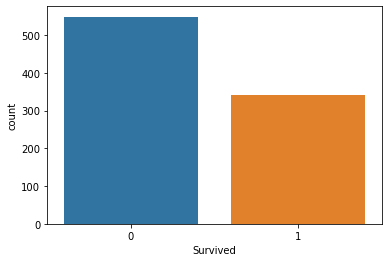

In [18]:
sns.countplot(x="Survived", data=datatrain)  

<AxesSubplot:xlabel='Survived', ylabel='count'>

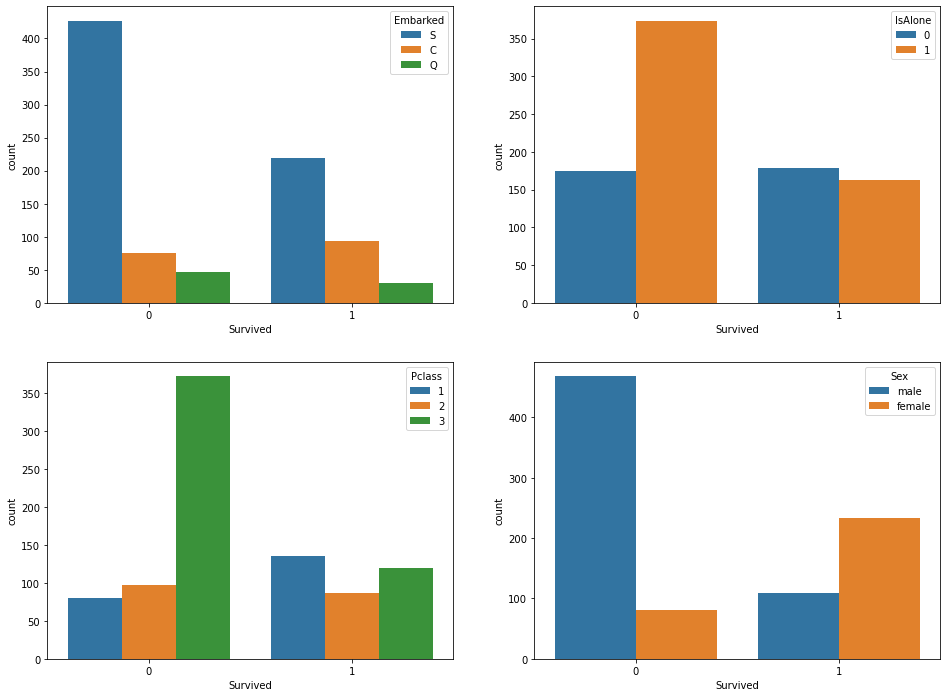

In [19]:
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Survived', hue="Embarked", data=datatrain,ax = saxis[0,0])   
sns.countplot(x='Survived', hue="IsAlone", data=datatrain,ax = saxis[0,1])
sns.countplot(x="Survived", hue="Pclass", data=datatrain, ax = saxis[1,0])
sns.countplot(x="Survived", hue="Sex", data=datatrain, ax = saxis[1,1])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

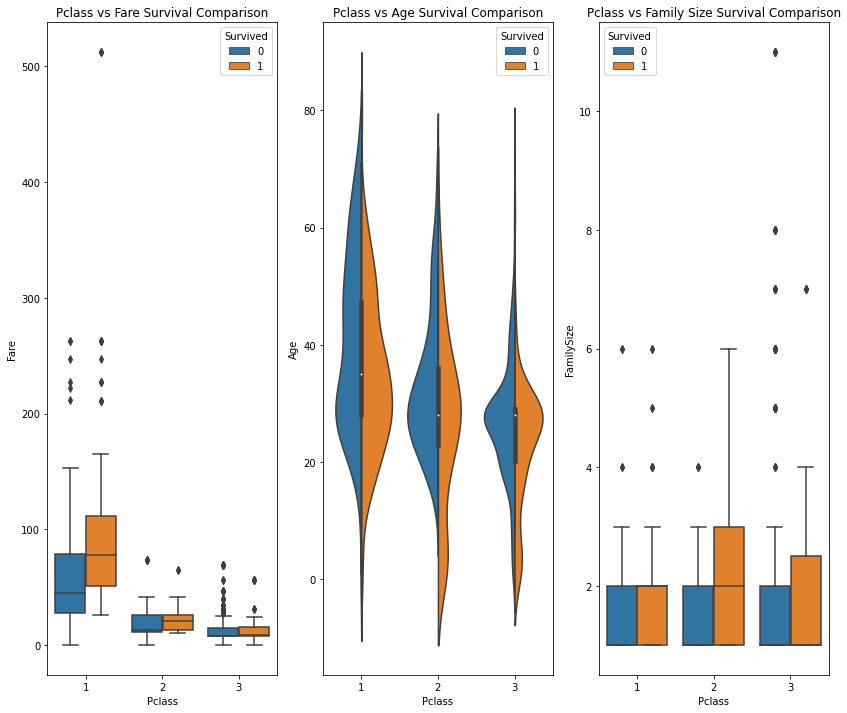

In [20]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = datatrain, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = datatrain, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = datatrain, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

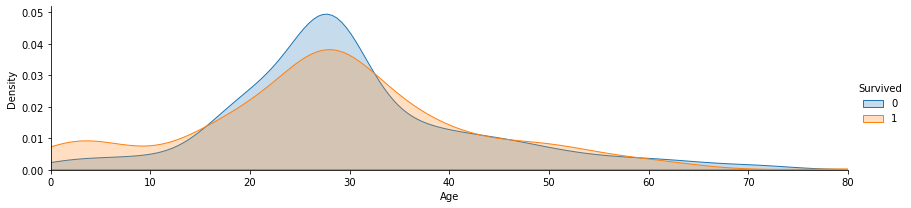

In [21]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( datatrain, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , datatrain['Age'].max()))
a.add_legend()

<AxesSubplot:>

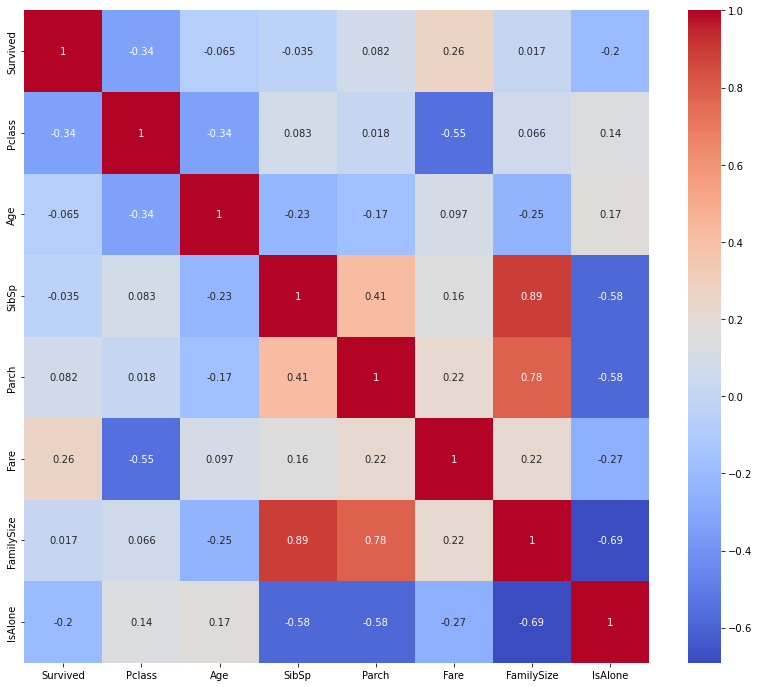

In [22]:
plt.subplots(figsize =(14, 12))
correlation = datatrain.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm')

In [23]:
#code categorical data
label = LabelEncoder()

for dataset in alltables:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
#define target
Target = ['Survived']

#define x variables feature selection
datatrain_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
datatrain_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] 
datatrain_xy =  Target + datatrain_x
print('Original X Y: ', datatrain_xy, '\n')

datatrain_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
datatrain_xy_bin = Target + datatrain_x_bin
print('Bin X Y: ', datatrain_xy_bin, '\n')

datatrain_dummy = pd.get_dummies(datatrain[datatrain_x])
datatrain_x_dummy = datatrain_dummy.columns.tolist()
datatrain_xy_dummy = Target + datatrain_x_dummy
print('Dummy X Y: ', datatrain_xy_dummy, '\n')

datatrain_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,3,1,0,22.0,7.2500,2,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
#split train and test data with function defaults
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(datatrain[datatrain_x_calc], datatrain[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(datatrain[datatrain_x_bin], datatrain[Target] , random_state = 0)

print("DataTrain Shape: {}".format(datatrain.shape))
print("Train1 Shape: {}".format(train1_x_dummy.shape))
print("Test1 Shape: {}".format(test1_x_dummy.shape))

DataTrain Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [25]:
train1_x_dummy.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,11,0,0,28.0,7.8958
68,0,3,2,8,4,2,17.0,7.9250
253,1,3,2,11,1,0,30.0,16.1000
320,1,3,2,11,0,0,22.0,7.2500
706,0,2,2,12,0,0,45.0,13.5000


In [26]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_predL = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predL))
print(confusion_matrix(test1_y_dummy, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test1_y_dummy))

DT = accuracy_score(y_predL,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       139
           1       0.70      0.68      0.69        84

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

[[115  24]
 [ 27  57]]
accuracy is 0.7713004484304933


In [27]:
from sklearn.metrics import roc_curve, auc

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test1_y_dummy, y_predL)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7529547790339157

Text(0.5, 0, 'False Positive Rate')

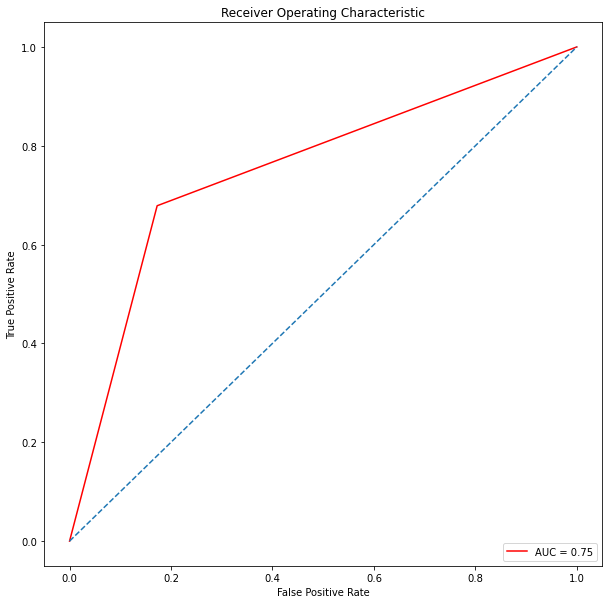

In [29]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [30]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predLR = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predLR))
print(confusion_matrix(test1_y_dummy, y_predLR))
# Accuracy score
print('accuracy is',accuracy_score(y_predLR,test1_y_dummy))

LR = accuracy_score(y_predLR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       139
           1       0.74      0.74      0.74        84

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[117  22]
 [ 22  62]]
accuracy is 0.8026905829596412


In [31]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(train1_x_dummy, train1_y_dummy)

y_predKN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predKN))
print(confusion_matrix(test1_y_dummy, y_predKN))
# Accuracy score

print('accuracy is',accuracy_score(y_predKN,test1_y_dummy))

KNN = accuracy_score(y_predKN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       139
           1       0.66      0.42      0.51        84

    accuracy                           0.70       223
   macro avg       0.69      0.64      0.65       223
weighted avg       0.69      0.70      0.68       223

[[121  18]
 [ 49  35]]
accuracy is 0.6995515695067265


In [32]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predN))
print(confusion_matrix(test1_y_dummy, y_predN))
# Accuracy score
print('accuracy is',accuracy_score(y_predN,test1_y_dummy))

NBB = accuracy_score(y_predN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       139
           1       0.68      0.80      0.74        84

    accuracy                           0.78       223
   macro avg       0.77      0.79      0.78       223
weighted avg       0.80      0.78      0.79       223

[[108  31]
 [ 17  67]]
accuracy is 0.7847533632286996


In [33]:
models = pd.DataFrame({
    'Model': ['Decision Tree','LogisticRegression','K-Nearest Neighbours', 'Naive Bayes', ],
    'Score': [DT, LR, KNN,NBB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,LogisticRegression,0.802691
3,Naive Bayes,0.784753
0,Decision Tree,0.771300
2,K-Nearest Neighbours,0.699552


Text(0, 0.5, 'Algorithm')

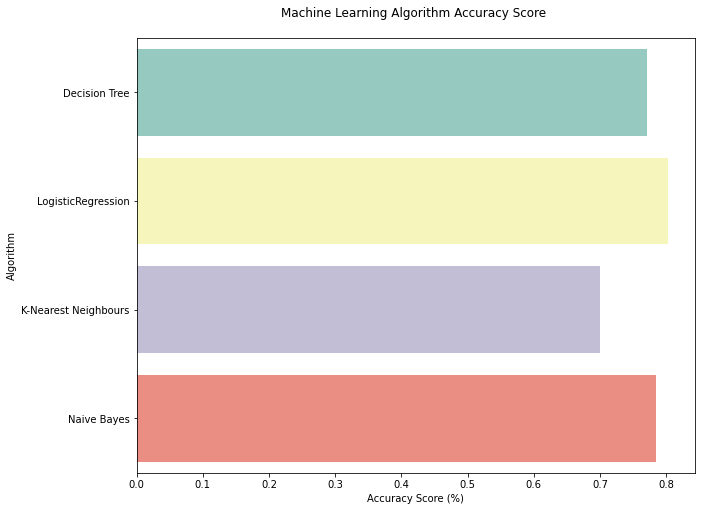

In [38]:
plt.subplots(figsize =(10, 8))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
submit_gbc = GradientBoostingClassifier()

submit_gbc.fit(datatrain[datatrain_x_bin], datatrain[Target])

rr = submit_gbc.predict(datatest[datatrain_x_bin])

In [40]:
submission = pd.DataFrame({"PassengerId": datatestcopy["PassengerId"],"Survived": rr })
submission.to_csv('titanic_submission1.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
